In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
from fractions import Fraction

from scipy import stats
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split

#### L'ensemble de données que nous utiliserons contient des informations sur un ensemble de maison dans la région de Boston

In [3]:
file_path = "E:/DSTI/Cours/Machine_Learning_Python_Lab/ML_Livre_JA/Boston.csv"

In [4]:
df = pd.read_csv(file_path)

In [5]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [7]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,7.88,11.9


In [8]:
df.shape

(506, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


La dataframe contient 506 lignes (chaque ligne représente une maison) et 13 variables. Pour comprendre la signification de chaque variable, veuillez-vous reporter à la page descriptive 10 de ces données. La variable MEDV est notre variable d'intérêt. Elle indique la valeur médiane des logements occupés par leur propriétaire en 1000 $.


In [10]:
df.isnull().sum()

CRIM       0
 ZN        0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

Apparemment, il n'y a pas de valeurs manquantes dans la dataframe.

Nous pouvons aussi vérifier s'il ya des lignes complètes dupliquées et les supprimer


In [11]:
# Nombre de lignes entières dupliquées
df.duplicated().sum()

# df.duplicated() : Cette méthode retourne une série booléenne qui indique si chaque ligne dans le DataFrame est une duplication 
#(c'est-à-dire si elle apparaît plus d'une fois dans le DataFrame). 

0

Il n' y a pas de lignes entières dupliquées

#### ANALYSE EXPLORATOIRE 
* Resumé statique des données 

In [12]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


* Corrélation entre variables 

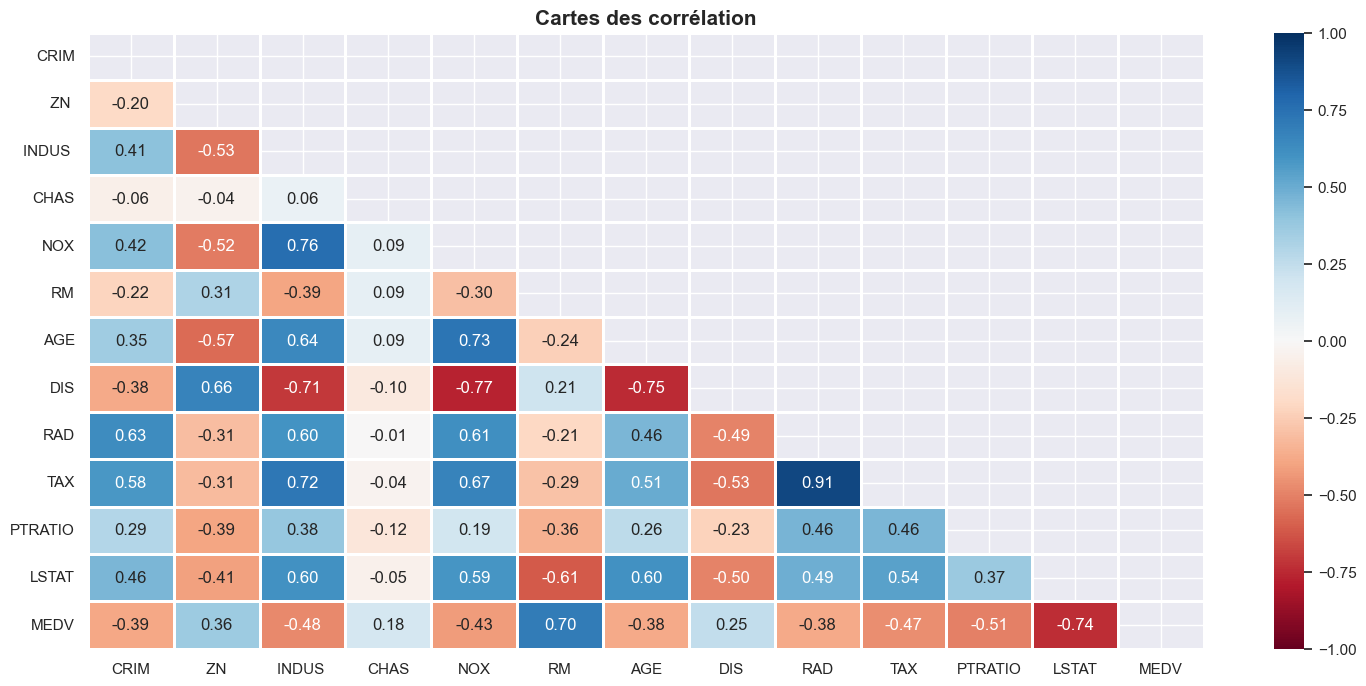

In [14]:
sns.set(rc = {"figure.figsize" : (18, 8)})
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(), mask= mask, center=0, cmap="RdBu", linewidths=1, annot=True, fmt=".2f", vmax= 1, vmin= -1)

plt.xlabel("")
plt.ylabel("")
plt.title("Cartes des corrélation", fontsize = 15, fontweight = "bold")
plt.show()

Cette carte nous indique la force des relations linéaires entre les variables indépendantes d'une part et entre chacune de ces variables avec la variable cible. Plus le carré est rouge, plus la corrélation entre les deux variables est forte et négative. Plus le carré est bleu, plus la corrélation entre les deux variables est forte et positive. Par exemple, il y a une forte corrélation positive entre la variable cible (MEDV) et la variable RM qui indique le nombre moyen de pièces par logement. Autrement dit plus la maison a de pièces, plus son prix est élevé (ce qui est tout à fait logique).

* DISTRIBUTION DES VARIABLES

Nous pouvons visualiser d'un seul coup la distribution de chaque variable :

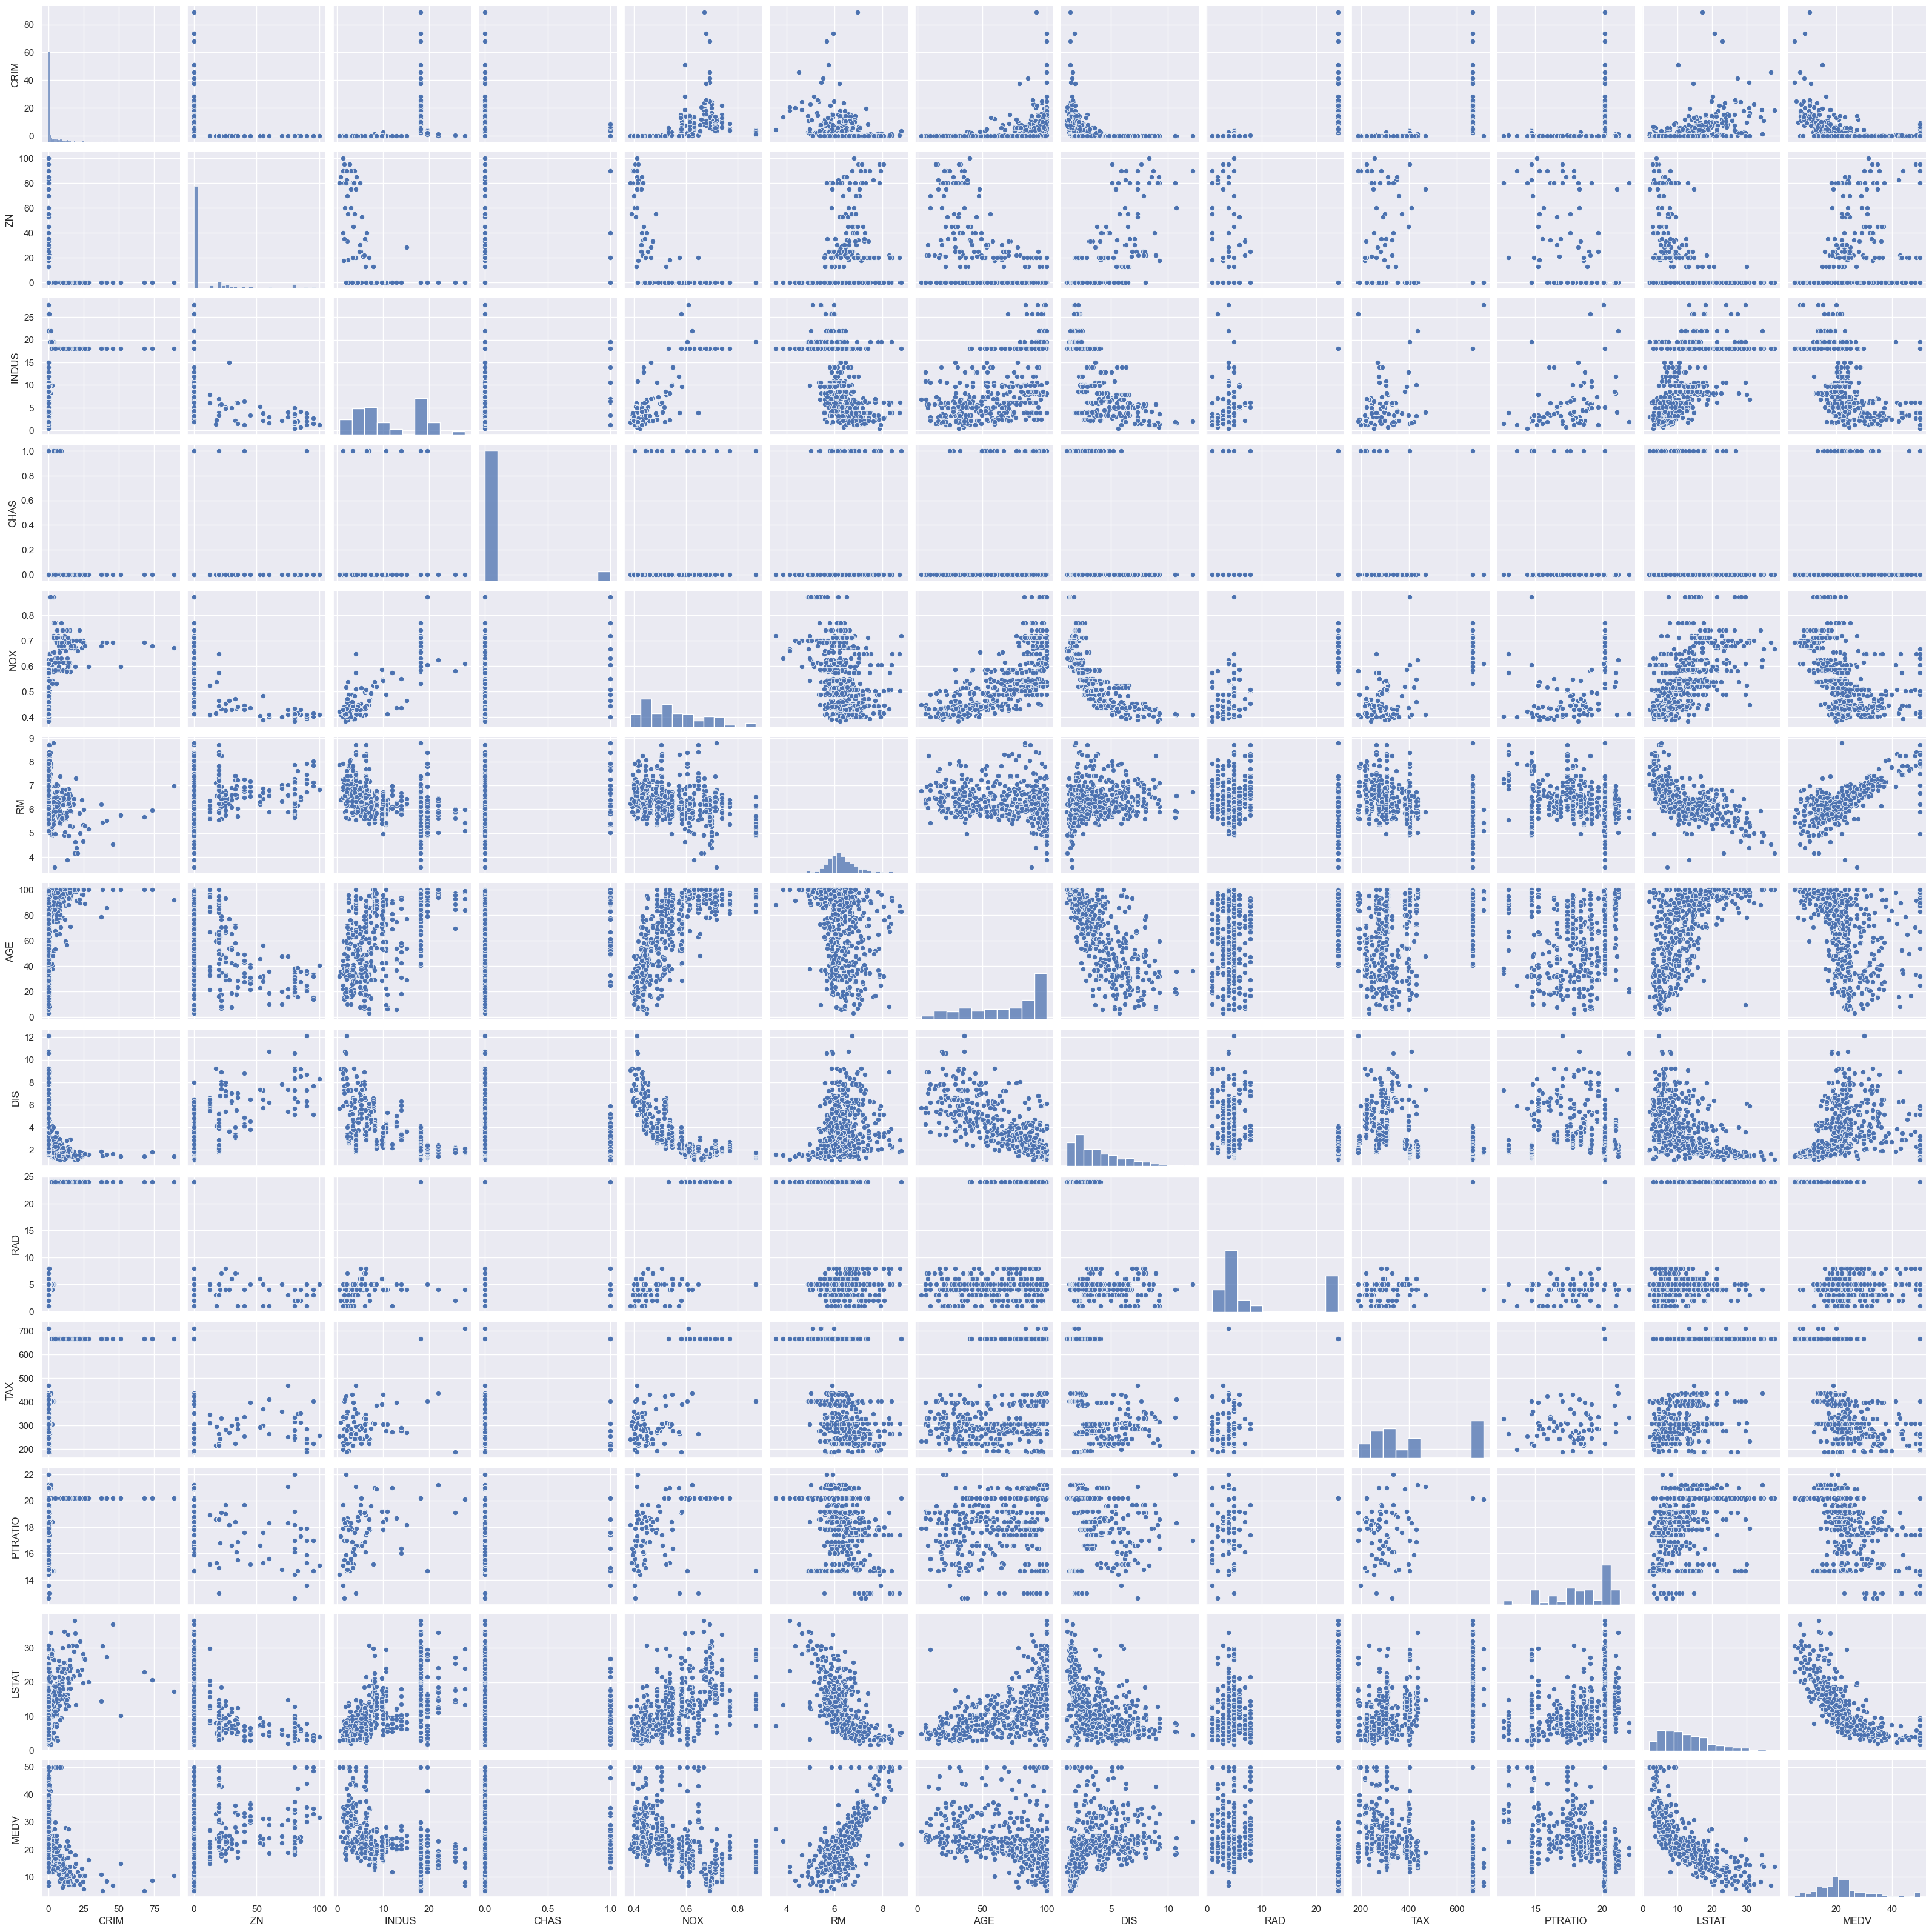

In [15]:
sns.pairplot(df)
plt.show()

La fonction pairplot " trace des relations par paires dans un jeu de données. Par défaut, cette fonction crée une grille d'axes de telle sorte que chaque variable numérique dans les données sera partagée dans l'axe des y sur une seule ligne et dans l'axe des x sur une seule colonne. 
Les axes diagonaux sont traités différemment, dessinant un tracé pour montrer la distribution univariée des données pour la variable dans cette colonne.

Nous pouvons aussi tracer séparément chaque histogramme. Traçons par exemple la distribution de la variable d'intérêt :

<Axes: xlabel='MEDV', ylabel='Density'>

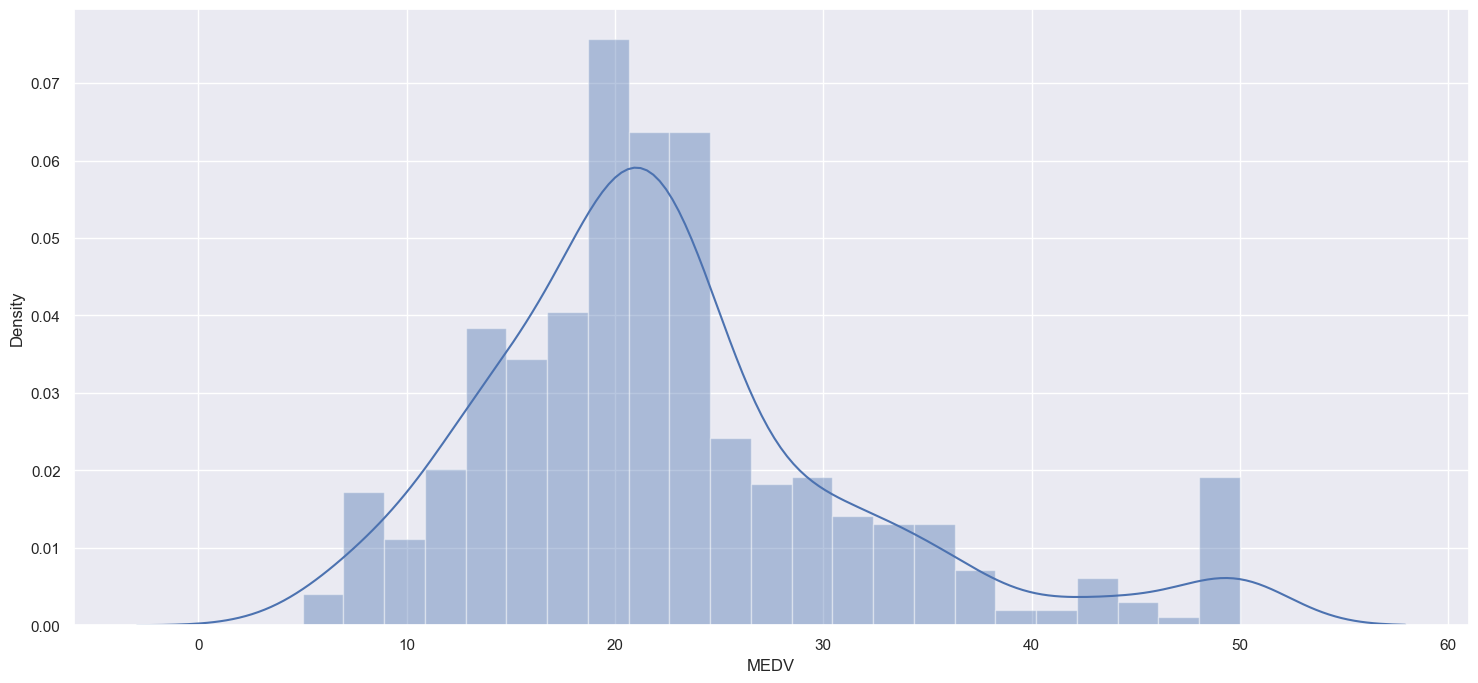

In [16]:
# Histogramme de la variable cible
sns.distplot(df["MEDV"])

Selon ce graphique, la distribution de la variable cible suit quasiment une loi normale.
Pourquoi s'intéresse-t-on si tant aux distributions des variables ?

La plupart des algorithmes de Machine Learning sont conçus selon l'hypothèse que les variables d'entrées suivent une loi normale. Si ce n'est pas le cas, cela peut affecter énormément la qualité du modèle et conduire à de mauvaises prédictions. Il existe plusieurs techniques de transformations de variables pour normaliser les variables (la transformation logarithmique par exemple). Afin d'être plus confiant sur la distribution de chaque variable par rapport à la loi normale, nous allons calculer les degrés d'asymétrie. Une distribution normale a un degré d'asymétrie égal à 0. Donc une variable suit la loi normale lorsque son degré d'asymétrie est
proche de 0.

In [17]:
# Calcul des degrés d'assymétrie
df.skew().sort_values()

PTRATIO   -0.802325
AGE       -0.598963
INDUS      0.295022
RM         0.403612
TAX        0.669956
NOX        0.729308
LSTAT      0.906460
RAD        1.004815
DIS        1.011781
MEDV       1.108098
 ZN        2.225666
CHAS       3.405904
CRIM       5.223149
dtype: float64

D'après ces résultats, les variables ayant les plus forts degrés d'asymétrie sont : ZN (proportion de terrains résidentiels zonés pour les lots de plus de 25 000 sq.ft.), 

CHAS (Variable fictive de Charles River égale à 1 si la zone délimite la rivière et 0 sinon) et CRIM (taux de criminalité par habitant par ville).

In [18]:
#Transformation logarithmique des variables 'CRIM', 'RAD', 'DIS', 'MEDV', 'CHAS' et 'ZN'

df['CRIM'] = np.log(df['CRIM'])
df['RAD'] = np.log(df['RAD'])
df['DIS'] = np.log(df['DIS'])
df['MEDV'] = np.log(df['MEDV'])
df['CHAS'] = np.log(df['CHAS'] + 1 )


In [19]:
# ______________________________Le 25/05/2024_________________________________________________________________

In [20]:
df.skew().sort_values()

PTRATIO   -0.802325
AGE       -0.598963
MEDV      -0.330321
DIS        0.152730
RAD        0.286617
INDUS      0.295022
RM         0.403612
CRIM       0.405934
TAX        0.669956
NOX        0.729308
LSTAT      0.906460
 ZN        2.225666
CHAS       3.405904
dtype: float64

Supprimons la variable "CHAS" à cause de son coefficient d'asymétrie trop élevé par rapport à celui des autres variables :

In [21]:
df.drop("CHAS", 
        axis = 1, 
        inplace = True)

Traçons une nouvelle carte de corrélation afin de voir si les relations linéaires ont été rnforcées ou pas après la transformation logarithmique de certaines variables :

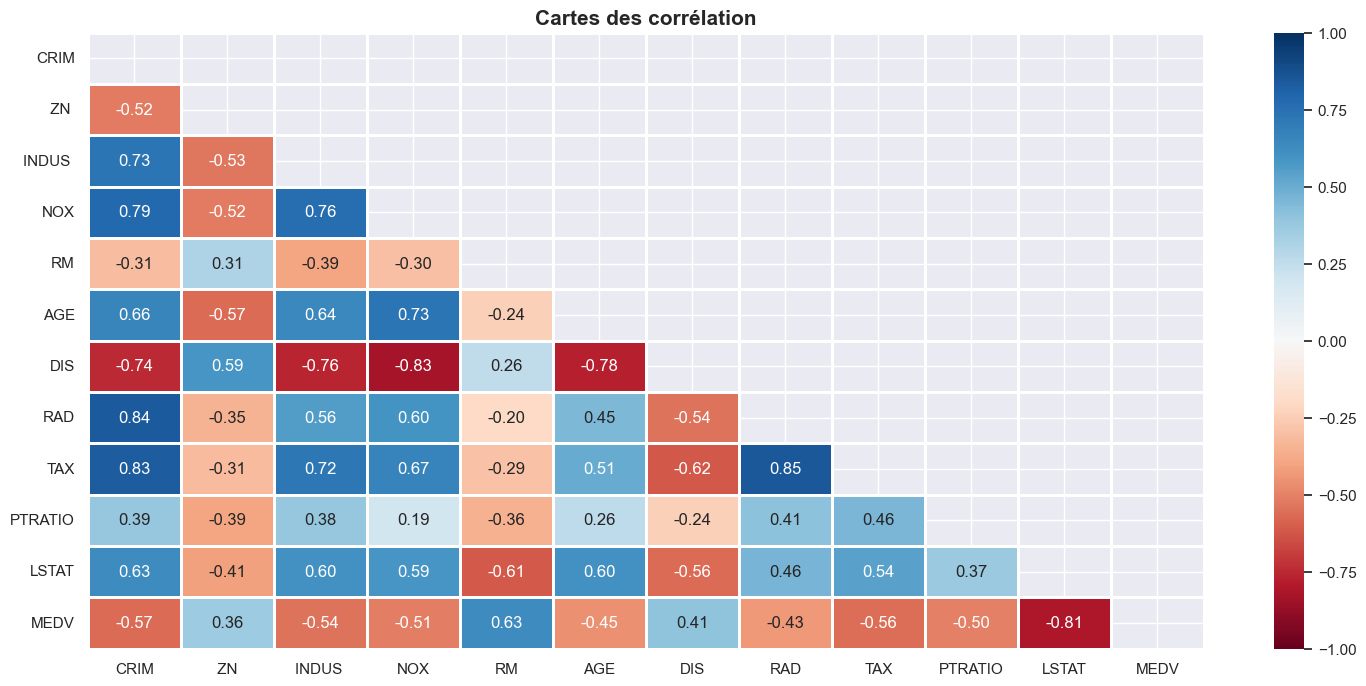

In [22]:
sns.set(rc = {"figure.figsize" : (18, 8)})
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

sns.heatmap(df.corr(), mask= mask, center=0, cmap="RdBu", linewidths=1, annot=True, fmt=".2f", vmax= 1, vmin= -1)

plt.xlabel("")
plt.ylabel("")
plt.title("Cartes des corrélation", fontsize = 15, fontweight = "bold")
plt.show()

En comparant cette nouvelle carte des corrélations à l'ancienne, nous remarquons effectivement un renforcement de la relation linéaire entre plusieurs variables. Par exemple, la relation linéaire entre la variable 'CRIM' et la variable cible s'est nettement améliorée (-0,39 à -0,57).

#### MODELISATION

Avant de passer à la construction du modèle, divisons d'abord la dataframe en données qui serviront à entraîner le modèle (train data) et en données d'évaluation de la performance du modèle (test data). Ainsi, nous pourrons mesurer la capacité de notre modèle à s'ajuster à de nouvelles données. Cette division se fait avec la fonction train test split.12

In [23]:
# Dataframe des variables indépendantes
x = df.drop('MEDV', axis = 1)

In [24]:
x

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,-5.064036,18.0,2.31,0.538,6.575,65.2,1.408545,0.000000,296,15.3,4.98
1,-3.600502,0.0,7.07,0.469,6.421,78.9,1.602836,0.693147,242,17.8,9.14
2,-3.601235,0.0,7.07,0.469,7.185,61.1,1.602836,0.693147,242,17.8,4.03
3,-3.430523,0.0,2.18,0.458,6.998,45.8,1.802073,1.098612,222,18.7,2.94
4,-2.672924,0.0,2.18,0.458,7.147,54.2,1.802073,1.098612,222,18.7,5.33
...,...,...,...,...,...,...,...,...,...,...,...
501,-2.770511,0.0,11.93,0.573,6.593,69.1,0.907694,0.000000,273,21.0,9.67
502,-3.095111,0.0,11.93,0.573,6.120,76.7,0.827460,0.000000,273,21.0,9.08
503,-2.800824,0.0,11.93,0.573,6.976,91.0,0.773574,0.000000,273,21.0,5.64
504,-2.211009,0.0,11.93,0.573,6.794,89.3,0.870833,0.000000,273,21.0,6.48


In [25]:
# Dataframe des variables dépendantes
y = df["MEDV"]

Pour obtenir la dataframe des variables indépendantes, nous avons juste supprimer la variable cible de df.

In [26]:
# Train/Test data
seed = 111
test_size = 0.2

seed
Définition : seed est une valeur utilisée pour initialiser le générateur de nombres aléatoires.
Utilité : Fixer une valeur pour seed permet de garantir que la randomisation soit reproductible. Cela signifie que chaque fois que vous exécutez le code avec la même valeur de seed, vous obtiendrez la même division des données.
Exemple : Si seed = 111, cela signifie que le générateur de nombres aléatoires est initialisé avec la valeur 111.

test_size
Définition : test_size est un paramètre qui définit la proportion du dataset à inclure dans l'ensemble de test.
Utilité : Ce paramètre contrôle combien de données seront utilisées pour évaluer le modèle après son entraînement.
Exemple : Si test_size = 0.2, cela signifie que 20% des données totales seront utilisées pour le test et 80% seront utilisées pour l'entraînemen

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split (x, y, test_size = test_size, random_state = seed)

In [28]:
# Affichage des dimensions
print ("X_train :", X_train. shape)
print ("Y_train :", Y_train. shape)
print ("X_ test :", X_test. shape)
print("y_test :", Y_test. shape)

X_train : (404, 11)
Y_train : (404,)
X_ test : (102, 11)
y_test : (102,)


Les valeurs que vous avez fournies représentent les dimensions des ensembles d'entraînement et de test après la division des données. Voici une explication détaillée de ce que chaque valeur représente :

Lorsqu'on divise les données, la grande partie est utilisée comme données d'entraînement et le reste comme données d'évaluation. Ici, nous avons choisi une taille de données de test égale à 20% du total des observations. Le paramètre random state permet d'obtenir une division reproductible à chaque fois que nous exécutons ce code.
Passons à présent à la construction du modèle.

In [29]:
# Création du modèle
model = LinearRegression()

In [30]:
# Entraînement de l'algorithme
model.fit(X_train, Y_train)

LinearRegression()

Nous avons d'abord défini un modèle de régression linéaire (variable model) puis nous l'avons ajuste aux données d'entraînement. La méthode d'ajustement fito de l'objet modèle a été appelée pour ajuster le modèle de régression linéaire aux données. L'ajustement consiste à estimer les coéfficient de regression (paramètres) en utilisant la méthode de moindre carrés ordinaires.

Une fois que le modèle est ajusté aux données, nous pouvons calculer certains paramètres le coefficients de determination (R²) , l'erreur quadratique moyenne (MSE) et afficher les coéfficients  ainsi que l'ordonnée à l'origine.

In [31]:
# Coefficient de détermination 
model.score(X_train, Y_train)

0.7602892729412419

Le Coefficient de détermination est 76 %

In [32]:
# Coefficient du modèle
model.coef_

array([-2.07176267e-02,  5.89217728e-04,  4.17811170e-03, -7.44369334e-01,
        9.39810101e-02, -2.01879042e-04, -2.20314458e-01,  1.09078074e-01,
       -7.08230358e-04, -3.39620848e-02, -3.30393291e-02])

Connaissant ces coefficients, nous pouvons écrire une équation de la variable cible égale à une combinaison linéaire des prédicteurs.
Avant de calculer l'erreur quadratique moyenne, nous devons générer les prédictions c'est-à-dire les valeurs de la variable MEDV calculées par notre modèle.

In [33]:
# Prédictions sur le train data
y_pred = model.predict(X_train)

In [34]:
y_pred 

array([3.6988904 , 3.16858538, 3.23417254, 2.79547096, 2.76267396,
       3.69484417, 3.4130566 , 2.48970999, 2.80005074, 2.36583751,
       3.19055807, 3.12484877, 3.38089897, 2.77857328, 2.17806779,
       2.63780667, 3.39199169, 3.3216124 , 3.64931719, 2.43993773,
       3.50275543, 2.96860175, 2.97586615, 1.93707138, 3.42763472,
       3.27203792, 3.2259056 , 2.91578894, 2.75728844, 3.60768576,
       3.13363928, 3.31846912, 3.22535328, 2.94730353, 3.69676484,
       3.55914729, 1.98905668, 2.96434214, 3.31590832, 2.53622289,
       2.38641054, 3.10550163, 3.06393155, 3.11672702, 2.75092069,
       2.8801638 , 3.02812166, 3.10597281, 2.73697738, 3.42576413,
       3.34120344, 3.22194248, 2.2717906 , 3.15187286, 3.23351082,
       2.37827409, 3.54725574, 2.69457918, 3.40555647, 3.31319917,
       2.85072321, 2.97244293, 3.03654275, 2.9358503 , 2.81394387,
       2.4744231 , 2.66775387, 3.44892433, 2.52827736, 3.54922507,
       3.17493811, 3.0638179 , 3.48445906, 3.71194353, 2.98372

In [35]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error

In [36]:
# Erreur quadratique moyenne
mean_squared_error(Y_train, y_pred)

0.03964615533040525

L'erreur quadratique moyenne est égale à 0,04


Afin de voir si notre modèle est capable de bien s'ajuster à de nouvelles données, calculons le coefficient de détermination et l'erreur quadratique moyenne cette fois-ci sur les données de test.

In [37]:
# Coefficient de détermination 
model.score(X_test, Y_test)

0.7339085286274165

Le Coefficient de détermination est 73 % est inférieur de celui de données d'entrainement (76 %).

In [38]:
# Prédiction sur le test data
Y_hat= model.predict(X_test)

In [39]:
# Erreur quadratique moyenne
mean_squared_error(Y_test, Y_hat)

0.0456319421383205

L'erreur quadratique moyenne du modèle sur les données de test est égale à environ 4 comme celui des données de test. Nous pouvons donc conclure qu'il n'y a pas un problème de surajustement et que notre modèle est capable de bien se généraliser.

*VALIDATION CROISEE DU MODELE

En divisant nos données, nous avons pu calculer certaines métriques sur les données de test afin de nous assurer que le modèle est capable de bien s'ajuster à de nouvelles données. Mais, il y a un écueil dans ce processus. Les données de test peuvent avoir certaines particularités qui font que le R? (ou l'erreur quadratique moyenne) ait donné telle ou telle autre valeur. Donc la métrique calculée n'est pas bien représentative de la capacité du modèle à généraliser sur de nouvelles données. Pour pallier à ce problème dû essentiellement à la division arbitraire de la fonction train test splito, nous utiliserons la technique de la validation croisée (cross-validation). 14

Pour comprendre la technique de cross-validation :
> Commençons par diviser la dataframe en 5 groupes ou plis ;

> Ensuite, le premier pli est pris comme ensemble de test et l'algorithme est entraîné avec les 4 plis restants. On fait les prédictions sur l'ensemble de test puis on calcule la métrique d'évaluation du modèle ;

> Le deuxième pli est maintenant utilisé comme ensemble de test et les 4 autres plis comme données d'entraînement ;

> On fait de même jusqu'à ce que chacun des 5 plis ait été utilisé comme ensemble de test.

Finalement, on se resure avec 5 modèles donc 5 métriques (R² par exemple) et on peut calculer des statistiques comme la moyenne ou la médiane de ces métiques. Au lieu de 5 plis, vous pouvez choisir k plis(k-fold crass validation) avec k un nombre entier naturel non null. Mais attention au nombre de plis car plus vous avez de plis, plus cela est coûteux en termes de calcul. La méthode de validation croisée nous permet d'éviter que la métrique d'évaluation choisie ne dépende du fractionnement arbitraire de la fonction train_test_spit().

Appliquons la technique de validation croisée avec 5 plis.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, cross_val_score

In [41]:
# Création d'un modèle
Linear_model = LinearRegression()

In [42]:
# 5- fold cross-validation
cv_scores = cross_val_score(linear_model, x, y, cv=5)
cv_scores

NameError: name 'linear_model' is not defined

Par défaut, crass_val_score 15, utilise R² comme métrique de choix pour la régression. Donc nous avons 5 R' et nous pouvons calculer la moyenne et la médiane.


In [ ]:
np.mean(cv_scores)

In [ ]:
np.median(cv_scores)

Le R' médian est égal à 0,59. Bien que cette valeur soit plus faible que les 0,73 obtenu en faisant un simple train test splitO, elle est beaucoup plus véridique. Nous pouvons valider le modèle et être plus confiant sur sa qualité.

In [ ]:
# Modèle final
lm = LinearRegression()

In [ ]:
lm.fit(x, y)